# 5. K-Means

In [89]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"
# 해당 코드는 Elbow Method 코드 실행시 발생하는 경고 메세지에 대한 대응

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('KMeansData.csv')
dataset[:5]

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [91]:
X = dataset.iloc[:, :].values
# == dataset.values
# == dataset.to_numpy() -> 공식 홈페이지 권장
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

### 데이터 시각화 (전체 데이터 분포)

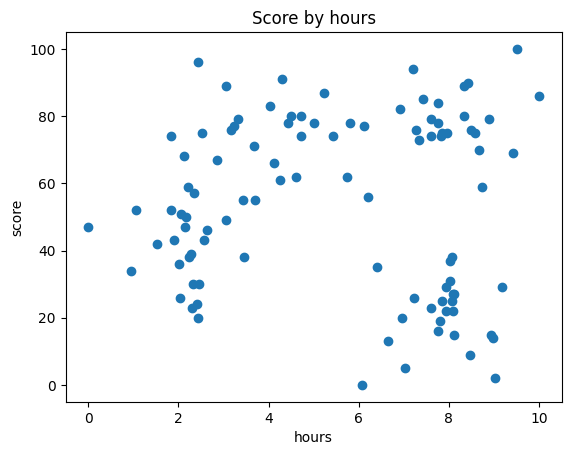

In [92]:
plt.scatter(X[:,0], X[:,1]) # x축은 공부시간, y축은 점수
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (축 범위 통일)

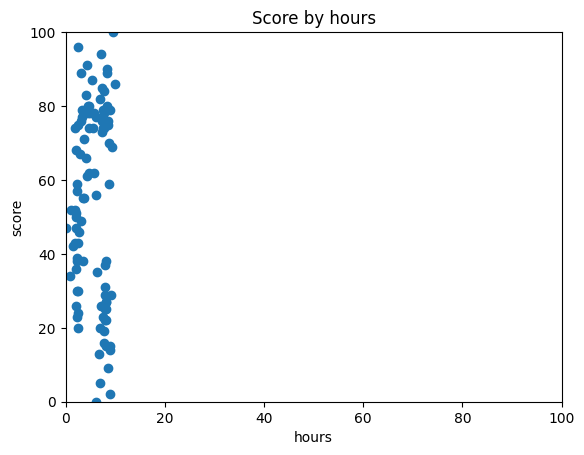

In [93]:
plt.scatter(X[:,0], X[:,1]) # x축은 공부시간, y축은 점수
plt.title('Score by hours')
plt.xlabel('hours')
plt.xlim(0, 100)
plt.ylabel('score')
plt.ylim(0, 100)
plt.show()

### 피처 스케일링 (Feature Scaling)
X축과 Y축의 scale이 매우 다를경우 시각화했을때 가시성이 떨어지기 때문에 스케일링 해야함

In [94]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

### 데이터 시각화 (스케일링된 데이터)

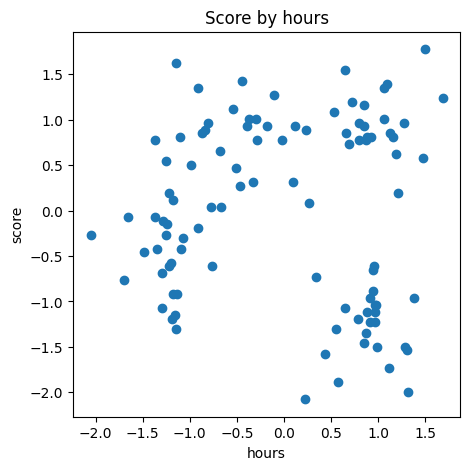

In [95]:
plt.figure(figsize=(5, 5)) 
plt.scatter(X[:,0], X[:,1]) # x축은 공부시간, y축은 점수
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()
# 이제는 scale과 가로세로축 길이가 같아져서 육안으로도 거리 파악가능

### 최적 K 값 찾기 (엘보우 방식 Elbow Method)

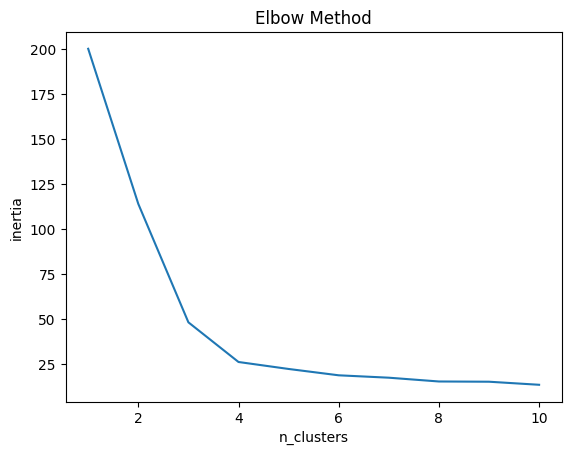

In [96]:
from sklearn.cluster import KMeans
inertia_list = []
# inertia는 클러스터링 용어로, 각 데이터와 해당 클러스터의 중심점(centroid)과의 거리의 제곱의 합
# K-Means 알고리즘은 이 inertia 값을 최소화하는것이 목표
for i in range(1, 11): # K(클러스터 개수)값을 1부터 10까지 -> 이 중에서 최적 K 찾아가는 과정
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    # init='k-means++' -> 초기 centroid 설정 방식을 K-Means++ 방식으로 설정 (default 값임)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)
    # 각 지점으로부터 클러스터의 centroid 까지의 거리의 제곱의 합

plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

### 최적의 K(4) 값으로 KMeans 학습

In [97]:
K = 4 # 최적의 K 값
# Elbow Method를 보면 알듯, K 값이 4에서부터 그래프가 완만해짐

In [98]:
kmeans = KMeans(n_clusters=K, random_state=0)
# kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X) # X데이터를 넣어서 학습하고 예측값을 반환받음
y_kmeans
# [1, 0, 3, 0, 0,....]
# 첫번째 데이터는 클러스터 1에 속하고
# 두번째 데이터는 클러스터 0에 속하고
# 세번째 데이터는 클러스터 3에 속하고
# 네번째 데이터는 클러스터 0에 속하고 ....

array([1, 0, 3, 0, 0, 2, 2, 0, 1, 0, 0, 3, 2, 3, 3, 0, 2, 1, 3, 0, 2, 0,
       3, 2, 1, 1, 3, 3, 3, 3, 2, 2, 3, 0, 1, 1, 3, 0, 0, 0, 3, 2, 1, 3,
       3, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 3, 2, 2, 1, 1, 1, 1, 2,
       2, 0, 2, 1, 3, 1, 1, 1, 3, 3, 3, 3, 0, 1, 2, 1, 2, 2, 1, 0, 3, 2,
       1, 3, 0, 2, 0, 1, 3, 0, 1, 0, 2, 3])

### 데이터 시각화 (최적의 K)

In [99]:
centers = kmeans.cluster_centers_ # 클러스터의 centroid 좌표
centers

array([[-0.54299598,  0.79316666],
       [ 0.96910697,  0.97133061],
       [ 0.8837666 , -1.26929779],
       [-1.24939347, -0.48807293]])

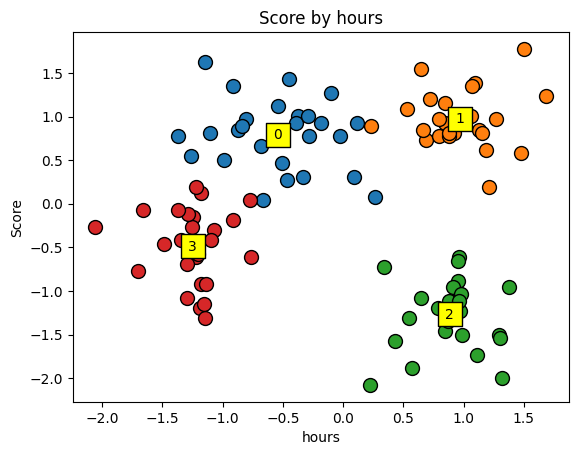

In [100]:
for cluster in range(K):
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s=100, edgecolors='black')
    # scatter(x축 데이터, y축 데이터) -> scatter(X[row, col], X[row, col])
    # 반복문에 의해 cluster가 0,1,2,3일때 row -> y_kmeans == cluster(0,1,2,3)가 True인 X 데이터
    # col = 0 (점수 칼럼) / col = 1 (공부시간 칼럼)인 X 데이터
    # s -> 점의 크기(size)
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s=300, edgecolors='black', 
                color='yellow', marker='s') # marker='s' -> 중심점 모양을 원이 아닌 사각형으로
    # centers[0, 0] = -0.5429..., centers[0, 1] = 0,7931...
    # Numpy 2차원 배열은 centers[0, 0]이라는 문법 사용가능
    # 파이썬 표준 리스트에서는 centers[0][0] 으로 해야됨
    plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va='center', ha='center') 
    # 클러스터 텍스트 출력, va는 수직정렬, ha는 수평정렬

plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('Score')
plt.show()

### 데이터 시각화 (스케일링 원복)

In [101]:
X_org = sc.inverse_transform(X) # Feature Scaling 된 데이터를 다시 원복
X_org[:5] # org -> origin

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [102]:
centers_org = sc.inverse_transform(centers)
centers_org

array([[ 4.04115385, 74.5       ],
       [ 8.08333333, 79.125     ],
       [ 7.8552    , 20.96      ],
       [ 2.1528    , 41.24      ]])

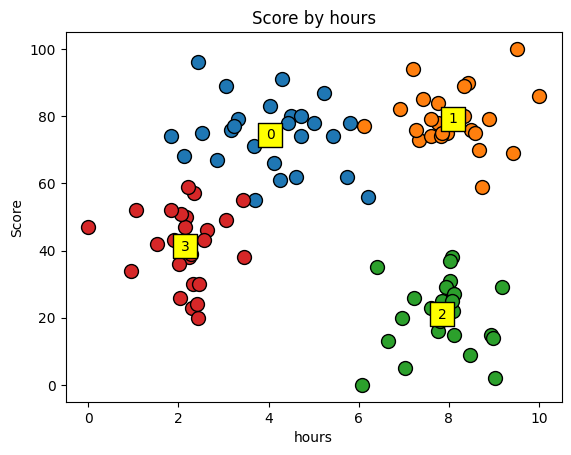

In [103]:
for cluster in range(K):
    plt.scatter(X_org[y_kmeans == cluster, 0], X_org[y_kmeans == cluster, 1], s=100, edgecolors='black')
    plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s=300, edgecolors='black', 
                color='yellow', marker='s')
    plt.text(centers_org[cluster, 0], centers_org[cluster, 1], cluster, va='center', ha='center')

plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('Score')
plt.show()

### K-Means 군집 분석 결과
* 클러스터 0에 속한 사람들은 공부시간이 적고 높은 성적을 받았음
* 클러스터 1에 속한 사람들은 공부시간이 많고 높은 성적을 받았음
* 클러스터 2에 속한 사람들은 공부시간이 많고 낮은 성적을 받았음
* 클러스터 3에 속한 사람들은 공부시간이 적고 낮은 성적을 받았음